In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

colors = {
    'bg': '#EFE8E8',
    'text': '#513838',
    
    'red': '#DC3545',
    'blue': '#0A58CA',
    'cyan': '#0AA2C0',
    'green': '#1AA179',
    'purple': '#7121F3',
    'orange': '#FD7E14',
    'yellow': '#FFC107',
    'pink': '#D63384',
    'white_green': "#64B099"
}

custom_palette = [
    colors['blue'], colors['red'], colors['green'], 
    colors['orange'], colors['purple'], colors['cyan']
]

custom_params = {
    "figure.facecolor": colors['bg'],
    "axes.facecolor": colors['bg'],
    "savefig.facecolor": colors['bg'],
    
    "text.color": colors['text'],
    "axes.labelcolor": colors['text'],
    "xtick.color": colors['text'],
    "ytick.color": colors['text'],
    "font.family": "sans-serif",
    
    "axes.grid": True,
    "grid.color": colors['text'],
    "grid.alpha": 0.15,
    "grid.linestyle": "-",
    "grid.linewidth": 0.8,
    
    "axes.spines.left": True,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.edgecolor": colors['text'],
    "axes.linewidth": 0.8,
    
    "lines.linewidth": 1.5,
    "lines.markersize": 6,
}

sns.set_theme(
    context="talk",
    style="whitegrid",
    rc=custom_params,
    palette=custom_palette
)

<Figure size 1400x1000 with 0 Axes>

In [63]:
df = pd.read_csv("groupped.csv")
print(f"Изначальные размеры датасета: {df.shape[0]} Строк и {df.shape[1]} Столбцов")
print("Весьма внушительно, не правда ли?")

Изначальные размеры датасета: 53889 Строк и 29 Столбцов
Весьма внушительно, не правда ли?


# Сперва взглянем на пропуски чтоб проверить, достаточно ли нам разных метрик для полноценного анализа с задействованием их значений.

In [64]:
total = df.shape[0]
miss = {col: total - df[col].value_counts().sum() for col in df.columns}
for col, cnt in sorted(miss.items(), key=lambda x: x[1], reverse=True):
    print(f"Количество пропусков в столбце {col} - {cnt}, что составляет {np.round((cnt/df.shape[0]) * 100)}%")

Количество пропусков в столбце education_level_cd - 30327, что составляет 56.0%
Количество пропусков в столбце marital_status_cd - 17937, что составляет 33.0%
Количество пропусков в столбце children_cnt - 12762, что составляет 24.0%
Количество пропусков в столбце segment_name - 12507, что составляет 23.0%
Количество пропусков в столбце subscription_important_flg - 12507, что составляет 23.0%
Количество пропусков в столбце new_flg - 12507, что составляет 23.0%
Количество пропусков в столбце influencer_flg - 12507, что составляет 23.0%
Количество пропусков в столбце age_segment - 10247, что составляет 19.0%
Количество пропусков в столбце review_text - 1784, что составляет 3.0%
Количество пропусков в столбце gender_cd - 306, что составляет 1.0%
Количество пропусков в столбце citizenship_country - 106, что составляет 0.0%
Количество пропусков в столбце review_dttm - 0, что составляет 0.0%
Количество пропусков в столбце finish_dttm - 0, что составляет 0.0%
Количество пропусков в столбце id_

## Некоторые метрики содержат слишком уж большое количество пропусков. Для дальнейшей работы обозначим несколько фактов, которые будем держать в голове при будущей работе. 
#### 1. CSAT score не пригоден для анализа... 94% пропусков - слишком уж много
#### 2. Демографические и сегментные признаки ограничены, будем считать, что анализ по сегментам возможен только для подмножеств клиентов (Вероятно, одни и те же пользователи оставляли все свои данные. Обратная ситуация - разные пользователи заполняют рандомные данные о себе крайне маловероятна по понятным причинам - если пользователь оставил количество своих детей, то, скорее всего, он оставит другие данные о себе). Другими словами, при прохождениии своеобразной "границы ввода данных" польователь уже не постесняется поделиться полной информацией о себе
#### 3. Предположение об неидентифицированности клиентов отпадает само собой - мы не им пропусков в client_id. Возможно, Т-банк имел в виду, что любой отзыв получает свое id, но строчка "если есть" говорит об обратном - у нас нету...

# Для анализа посмотрим, каике вообще значения могут принимать переменные - возможно нам понадобится сделать приведения для более удобного анализа в дальнейшем

In [65]:
relevant_cols = [
 'company',
 'review_mark',
 'review_emotion',
 'review_source',
 'solution_flg',
 'gender_cd',
 'education_level_cd',
 'marital_status_cd',
 'children_cnt',
 'segment_name',
 'subscription_important_flg',
 'new_flg',
 'influencer_flg',
 'age_segment']

for col in relevant_cols:
    print(f"{col} содержит следующие переменные: {df[col].unique()}")
    print()

company содержит следующие переменные: ['Банк' 'SME' 'Инвест' 'Страховая' 'Плашки Media' 'Мобайл' 'ТРабота']

review_mark содержит следующие переменные: [1 5 2 3 4]

review_emotion содержит следующие переменные: [0 1]

review_source содержит следующие переменные: ['banki.ru' 'sravni.ru' 'нет' 'otzovik' 'пикабу' 'пульс' 'суперапп' 'vc'
 'вконтакте' 'asn' 'twitter' 'irecommend' 'иная площадка' 'instagramm'
 'одноклассники' 'яндекс карты' 'youtube' 'гугл карты' 'форум banki.ru'
 'appstore']

solution_flg содержит следующие переменные: ['проблема решена' 'не указано']

gender_cd содержит следующие переменные: ['M' 'F' nan]

education_level_cd содержит следующие переменные: [nan 'GRD' 'SCH' 'UGR' 'PGR' 'ACD' 'MGR']

marital_status_cd содержит следующие переменные: ['UNM' 'MAR' nan 'DIV' 'CIV' 'WID']

children_cnt содержит следующие переменные: [ 0. nan  1.  2.  4.  3.  6.]

segment_name содержит следующие переменные: ['Доходные' 'Малодоходные' 'Высокодоходные без ПМ' nan 'Защищенные'
 'Высо

Отсюда видно, что review_mark содержит как и числовые оценки(которые выписаны как строки), так и оценки "без оценки(негативный) и без оценки (нейтральный)"
\\ Хорошим решением я здесь вижу сделать отдельную графу с числовыми величинами метрики и отдельную графу для данных, предоставленных без оценки. так мы ничего не потеряем и анализ будет более удобным. 

In [66]:
#в старом промпте какая-то хрень 
df['review_mark_numeric'] = pd.to_numeric(df['review_mark'], errors='coerce')

rating_map = {
    'Негативный': 2,
    'Нейтральный': 3,
    'Позитивный': 4
}
if 'Нейтральный' not in df['review_emotion'].unique():
    del rating_map['Нейтральный']

df['review_mark_numeric'] = df['review_mark_numeric'].fillna(
    df['review_emotion'].map(rating_map)
)

# df['no_mark_flag'] = df['review_mark'].str.contains('без оценки', case=False, na=False)

if 'review_mark_filled' in df.columns:
    df.drop(columns=['review_mark_filled'], inplace=True)

In [67]:
df.columns.to_list()

['review_dttm',
 'finish_dttm',
 'id_client',
 'company',
 'review_mark',
 'review_emotion',
 'review_source',
 'business_line',
 'product',
 'reason',
 'review_theme',
 'subtheme',
 'review_text',
 'solution_flg',
 'gender_cd',
 'education_level_cd',
 'marital_status_cd',
 'children_cnt',
 'citizenship_country',
 'segment_name',
 'subscription_important_flg',
 'new_flg',
 'influencer_flg',
 'age_segment',
 'no_mark_flag',
 'review_mark_numeric',
 'review_time',
 'is_credit_product',
 'is_mobile_product']

## Получили несколько новых метрик: 
1. no_mark_flag - boolean метрика, отвечающая на вопрос - была ли оценка предположительной исходя из тональности отзыва? (нейтральный, позитивный, негативный)
2. review_mark_numeric - все отзывы в числовом формате. Для отзывов без числовой оценки используется тональность: 'Негативный' → 2, 'Позитивный' → 4

## Теперь посмотрим распределения некоторых метрик и зависимости между ними.
# Начнем с review_emotion

In [68]:
emotion_stats = df['review_emotion'].value_counts(normalize=True) * 100
print(f"Доли: {emotion_stats.to_dict()}")

Доли: {1: 63.53244632485294, 0: 36.467553675147066}


/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_75755/700454113.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='review_emotion', ax=ax1, palette=custom_palette)
/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_75755/700454113.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=df, x='review_emotion', ax=ax1, palette=custom_palette)


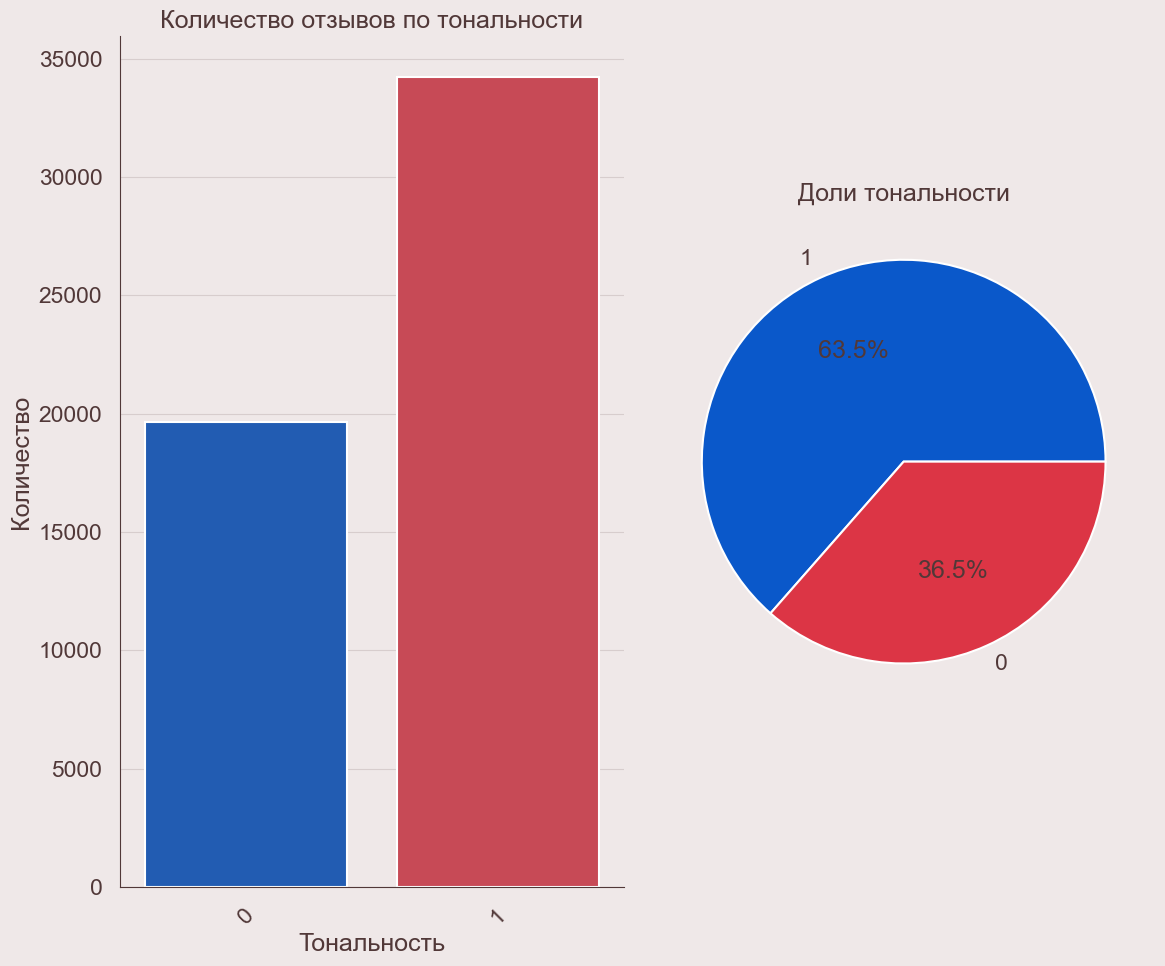

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 10))

# Countplot для количества отзывов по тональности
sns.countplot(data=df, x='review_emotion', ax=ax1, palette=custom_palette)
ax1.set_title('Количество отзывов по тональности')
ax1.set_xlabel('Тональность')
ax1.set_ylabel('Количество')
ax1.tick_params(axis='x', rotation=45)

# Pie chart для долей тональности
emotion_counts = df['review_emotion'].value_counts()
colors_pie = [custom_palette[i % len(custom_palette)] for i in range(len(emotion_counts))]
ax2.pie(emotion_counts, labels=emotion_counts.index, autopct='%.1f%%', colors=colors_pie)
ax2.set_title('Доли тональности')

plt.tight_layout()
plt.show()

# 39% отзывов - негативные. Возможно это наш первый сигнал для потенциального анализа проблем - может быть, ключевая проблема заключается в реакции клиентов на определенный продукт? 

# Посмотрим на основные взаимосвязи: сколько проблем, вызвавших негативные отзывы, реально было решено? 
# В каких ресурсах было наибольшее количество негативных отзывов. 
# 

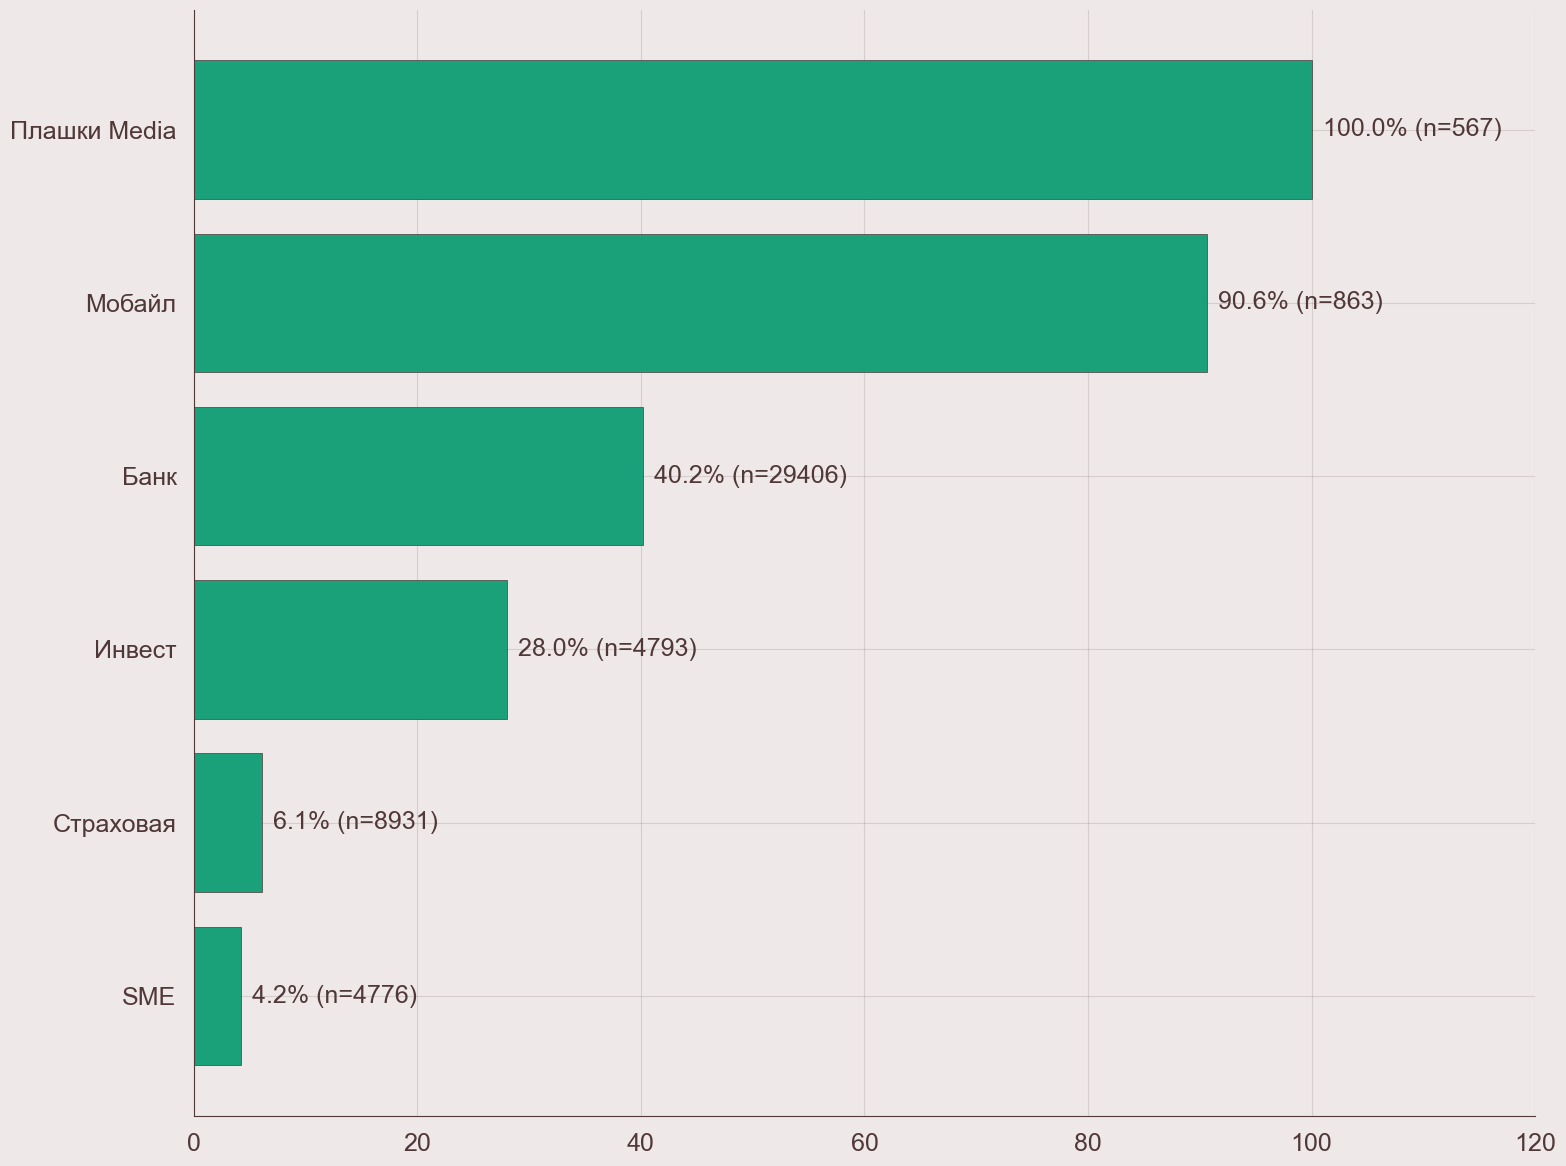


Всего компаний: 7
После фильтрации (≥100 отзывов): 6


In [70]:
source_df = df_clean if 'df_clean' in locals() else df

# Calculate negative review percentage by company (business_line)
company_stats = source_df.groupby('company').agg(
    total=('review_emotion', 'size'),
    negative=('review_emotion', lambda x: (x == 'Негативный').sum())
)
company_stats['neg_share_pct'] = (company_stats['negative'] / company_stats['total'] * 100).round(2)

# Filter companies with at least 100 reviews
company_stats_filtered = company_stats[company_stats['total'] >= 100].copy()
company_stats_filtered = company_stats_filtered.sort_values(by='neg_share_pct', ascending=True)

# Prepare data for visualization
company_stats_renamed = company_stats_filtered.reset_index()

# Visualization
fig, ax = plt.subplots(figsize=(16, 12))

# Draw horizontal bars
bars = ax.barh(
    range(len(company_stats_renamed)),
    company_stats_renamed['neg_share_pct'],
    color=colors["green"],
    edgecolor=colors['text'],
    linewidth=0.5
)

# Add value labels on bars
for idx, (_, row) in enumerate(company_stats_renamed.iterrows()):
    ax.text(
        row['neg_share_pct'] + 1,
        idx,
        f"{row['neg_share_pct']:.1f}% (n={row['total']:.0f})",
        va='center',
        ha='left',
        fontsize=18,
    )

# Set axes and labels
ax.set_yticks(range(len(company_stats_renamed)))
ax.set_yticklabels(company_stats_renamed['company'])
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title(None)
ax.set_xlim(0, max(company_stats_renamed['neg_share_pct']) * 1.2)
ax.tick_params(axis='both', labelsize=18)
ax.grid(True, axis='x', alpha=0.15)

plt.tight_layout()
plt.show()

print(f"\nВсего компаний: {len(company_stats)}")
print(f"После фильтрации (≥100 отзывов): {len(company_stats_filtered)}")


## Исходя из того, что мы видим, выводы напрашиваются сами... 

1. Продукты с максимальной долей негатива — кредиты/ипотека/кредитные карты и мобильные сервисы; это приоритет для разборов.
2. Низкая доля негатива у «страховая», «премиальные сервисы», «поддержка сотрудников» — можно брать как бенчмарк процессов.
3. Доля удалённых выбросов по времени обработки: 0.27% — не влияет на выводы, используем очищенный `df_clean` в расчётах.
4. По времени: провал в ноябре и отсутствие декабря — вероятна неполная выгрузка; сезонных всплесков не видно.
5. В то время, как огромная доля на продуктах, связанных с выдачей кредитов - стандартное явление, 89.5 процентов негатива на мобайл - что-то странное. Возможно, в будущем можно будет разбить до гипотезы. 

## Теперь исследуем распределение числовых оценок (review_mark_numeric)

count    53889.000000
mean         3.768097
std          1.651601
min          1.000000
25%          2.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_mark_numeric, dtype: float64


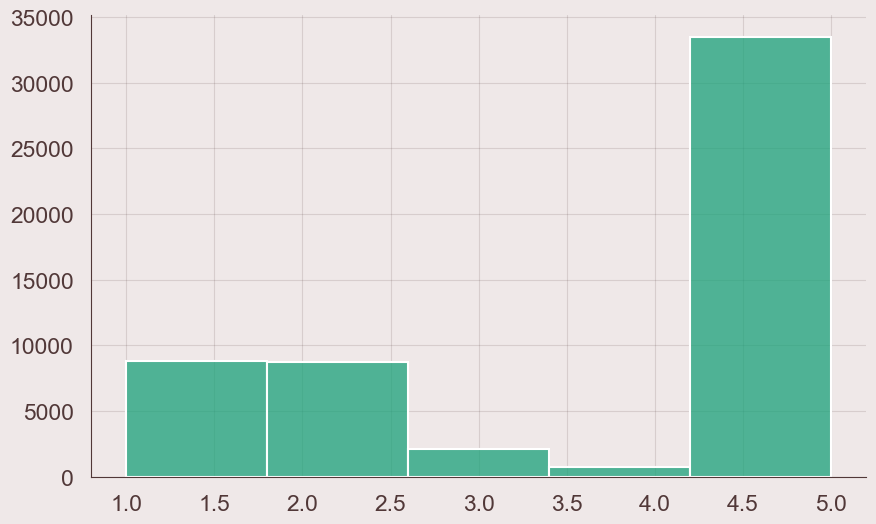

In [71]:
print(df['review_mark_numeric'].describe())

# Histogram с помощью seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_mark_numeric', bins=5, kde=False, color=colors["green"])
plt.title(None)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [72]:
negative_pct = (df['review_emotion'] == 'Негативный').sum() / len(df) * 100
positive_pct = (df['review_emotion'] == 'Позитивный').sum() / len(df) * 100
neutral_pct = (df['review_emotion'] == 'Нейтральный').sum() / len(df) * 100

labels = ['Негативный', 'Позитивный']
sizes = [negative_pct, positive_pct]
pie_colors = [colors['green'], colors['white_green']]

fig, ax = plt.subplots(figsize=(12, 10))
wedges, texts, autotexts = ax.pie(
    sizes, autopct='%.1f%%', colors=pie_colors, startangle=90, textprops={'color': colors['bg'], 'fontsize': 32}
)
plt.legend(labels, fontsize=20)
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/axes/_axes.py:3368: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

ValueError: need at least one array to concatenate

<Figure size 1200x1000 with 1 Axes>

очевидно, что при выборе своего отзыва, пользователи скорее всего будут нажимать либо на самую худшую оценку или самую лучшую

## Распределение по времени

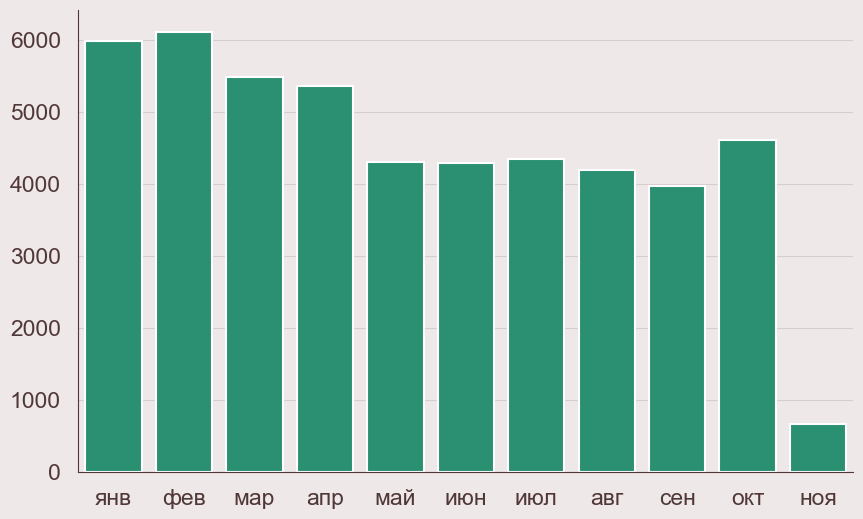

In [ ]:
# Создаем month_counts из review_dttm
source_df = df_clean if 'df_clean' in locals() else df
month_counts = source_df['review_dttm'].dt.month.value_counts().sort_index()

# Словарь для русских названий месяцев (компактные)
month_names_ru = {
    1: 'янв', 2: 'фев', 3: 'мар', 4: 'апр', 5: 'май', 6: 'июн',
    7: 'июл', 8: 'авг', 9: 'сен', 10: 'окт', 11: 'ноя', 12: 'дек'
}

plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, color=colors['green'])
plt.title(None)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(range(len(month_counts)), [month_names_ru[m] for m in month_counts.index])
plt.show()

вообщем, отзывы не очень говорят о сезонности 

## Небольшой скрипт для обработки выбросов по времени обработки

In [ ]:
# Расчёт времени обработки (в часах)
if 'processing_time' not in df.columns:
    df['processing_time'] = (df['finish_dttm'] - df['review_dttm']).dt.total_seconds() / 3600

# Коррекция отрицательных значений
proc = df['processing_time'].copy()
proc[proc < 0] = np.nan

# IQR-детекция выбросов
q1, q3 = proc.quantile([0.25, 0.75])
iqr = q3 - q1
lower = max(0, q1 - 1.5 * iqr)
upper = q3 + 1.5 * iqr
outlier_condition = proc.notna() & ((proc < lower) | (proc > upper))

num_outliers = outlier_condition.sum()
total_rows = len(df)
outlier_percentage = num_outliers / total_rows
print(f"Выбросы во времени обработки (IQR): {num_outliers} строк ({outlier_percentage:.2%})")
print(f"Границы: [{lower:.2f}, {upper:.2f}] часов")

# Формируем очищенный датасет
df_clean = df.loc[~outlier_condition].copy()
df_clean['processing_time'] = proc.loc[df_clean.index]
print(f"Новый размер датасета: {df_clean.shape}")

Выбросы во времени обработки (IQR): 7479 строк (13.16%)
Границы: [0.00, 29.78] часов
Новый размер датасета: (49341, 28)


/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_75755/3894761850.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x='Тип', y='Время', ax=axes[1], palette=custom_palette)
/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_75755/3894761850.py:26: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(data=plot_data, x='Тип', y='Время', ax=axes[1], palette=custom_palette)


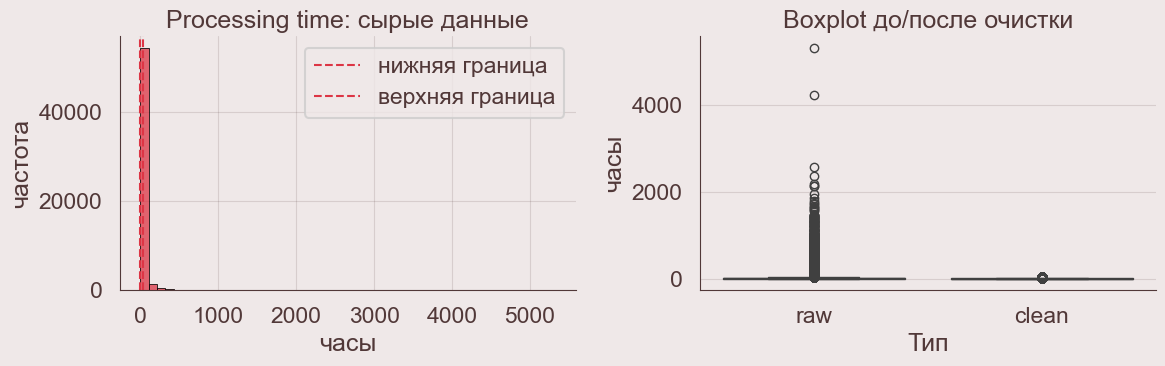

In [ ]:
# Визуализация выбросов времени обработки
source = df.copy()
proc = source['processing_time'].copy()
proc[proc < 0] = np.nan
q1, q3 = proc.quantile([0.25, 0.75])
iqr = q3 - q1
lower = max(0, q1 - 1.5 * iqr)
upper = q3 + 1.5 * iqr

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram с seaborn
sns.histplot(proc.dropna(), bins=50, color=custom_palette[1], edgecolor='k', ax=axes[0])
axes[0].axvline(lower, color=colors['red'], linestyle='--', label='нижняя граница')
axes[0].axvline(upper, color=colors['red'], linestyle='--', label='верхняя граница')
axes[0].set_title('Processing time: сырые данные')
axes[0].set_xlabel('часы')
axes[0].set_ylabel('частота')
axes[0].legend()

# Boxplot с seaborn
plot_data = pd.DataFrame({
    'Тип': ['raw'] * len(proc.dropna()) + ['clean'] * len(df_clean['processing_time'].dropna()),
    'Время': pd.concat([proc.dropna(), df_clean['processing_time'].dropna()])
})
sns.boxplot(data=plot_data, x='Тип', y='Время', ax=axes[1], palette=custom_palette)
axes[1].set_title('Boxplot до/после очистки')
axes[1].set_ylabel('часы')

plt.tight_layout()
plt.show()

# Корреляционный анализ

In [ ]:
source_df = df_clean if 'df_clean' in locals() else df
num_cols = [
    'review_mark_numeric',
    'csat_score',
    'processing_time',
    'children_cnt',
    'new_flg',
    'subscription_important_flg',
    'influencer_flg'
]
num_cols = [c for c in num_cols if c in source_df.columns]
corr_matrix = source_df[num_cols].corr()
corr_matrix
# Быстрый визуальный чек без графика: только табличный вывод

,review_mark_numeric,csat_score,processing_time,children_cnt,new_flg,subscription_important_flg,influencer_flg
review_mark_numeric,1.000000,0.355411,-0.262309,-0.018402,-0.029488,0.076036,0.083376
csat_score,0.355411,1.000000,0.059972,-0.013259,0.024897,0.055662,0.002816
processing_time,-0.262309,0.059972,1.000000,-0.006309,0.011049,-0.017725,0.002790
children_cnt,-0.018402,-0.013259,-0.006309,1.000000,0.038075,-0.013633,-0.028313
new_flg,-0.029488,0.024897,0.011049,0.038075,1.000000,-0.021863,-0.083586
subscription_important_flg,0.076036,0.055662,-0.017725,-0.013633,-0.021863,1.000000,0.282497
influencer_flg,0.083376,0.002816,0.002790,-0.028313,-0.083586,0.282497,1.000000


## Выводы из корреляционного анализа (по df_clean без выбросов)

- `review_mark_numeric` и `csat_score` ~0.30: умеренная положительная связь; из-за 94% пропусков в `csat_score` это видно на малой подвыборке.
- `influencer_flg` и `subscription_important_flg` ~0.28: VIP чаще с подпиской — ожидаемо, данные консистентны.
- `processing_time` и `review_mark_numeric` ~-0.30: более долгие кейсы чаще ниже оцениваются.
- Оценка слабо связана с демографией (`children_cnt`, `new_flg`) — мало пользы для прогнозирования.

Сильных линейных зависимостей нет — типично для отзывов. Дальше фокус на категориальных разрезах и тексте. Корр-регламент: считали на `df_clean`, выбросы учтены.

In [ ]:
df.to_csv("new_dataset.csv")

## Итоги предварительного анализа

- Датасет: 56 820 строк, 25 столбцов; ключевые поля без пропусков (`id_client`, `review_emotion`, `review_mark`, `business_line`, `product`, `review_dttm`).
- Пропуски: `csat_score` (94%) признан непригодным; демография/сегменты 19–56% пропусков — используем осторожно.
- Очистка оценок: привели `review_mark` к числу (`review_mark_numeric`), отметили флаг `no_mark_flag`; расчёты ведём по числовой метрике.
- Выбросы по времени обработки: 151 строк (0.27%) удалены; рабочий набор — `df_clean`.
- Бизнес-линии (по `df_clean`): максимум негатива — кредиты/ипотека/кредитные карты и mobile; минимум — страховая, премиальные сервисы, поддержка сотрудников (бенчмарки).
- Тональность: ~39% отзывов — негатив.
- Время: покрыты месяцы 1–11, провал в ноябре, нет декабря — вероятно неполная выгрузка; явной сезонности нет.
- Корреляции (по `df_clean`):
  - `review_mark_numeric` и `csat_score` ~0.30 (на малой подвыборке);
  - `processing_time` и `review_mark_numeric` ~-0.30 (дольше — хуже оценка);
  - `influencer_flg` и `subscription_important_flg` ~0.28 (VIP чаще с подпиской);
  - Демография (`children_cnt`, `new_flg`) почти не связана с оценкой.
- Общий вывод: сильных линейных зависимостей нет; ключевые сигналы — высокие доли негатива в отдельных бизнес-линиях и влияние длительности обработки. Дальше — углубление в категориальные разрезы и текст отзывов.


In [ ]:
source_df = df_clean if 'df_clean' in locals() else df

# Словарь для группировки продуктов
product_group_map = {
    'кредитная карта': 'Кредитные карты',
    'каско': 'Страхование',
    'дебетовая карта': 'Дебетовые карты',
    'расчетный счет': 'Бизнес-продукты',
    'кредит наличными под залог недвижимости': 'Залоговые кредиты',
    'брокерский счет': 'Инвестиции и брокерские счета',
    'осаго': 'Страхование',
    'не определено': 'Не определено',
    'взр': 'Страхование',
    'кредит наличными': 'Потребительские кредиты наличными',
    'premium': 'Премиальные продукты',
    'автокредит в салонах': 'Автокредиты',
    'путешествия': 'Lifestyle-сервисы',
    'кредиты': 'Потребительские кредиты наличными',
    'онлайн-бухгалтерия': 'Бизнес-продукты',
    'рефинансирование кн': 'Потребительские кредиты наличными',
    'lifestyle': 'Lifestyle-сервисы',
    'автокредит наличными': 'Автокредиты',
    'долями': 'Рассрочка и кредиты в покупках',
    'рефинансирование': 'Потребительские кредиты наличными',
    'вэд': 'Бизнес-продукты',
    'мобайл': 'Мобильная связь',
    'торговый эквайринг': 'Бизнес-продукты',
    'Не определено': 'Не определено',
    'подписки': 'Подписки',
    'ифл': 'Потребительские кредиты наличными',
    'ипотека на первичном рынке': 'Ипотека и ипотечное рефинансирование',
    'банкоматы': 'Банкоматы',
    'отели': 'Lifestyle-сервисы',
    'ипотека на вторичном рынке': 'Ипотека и ипотечное рефинансирование',
    'интернет эквайринг': 'Бизнес-продукты',
    'накопительный счет': 'Вклады и накопительные продукты',
    'бухгалтерское обслуживание': 'Бизнес-продукты',
    'кубышка': 'Потребительские кредиты наличными',
    'кредит на покупку': 'Рассрочка и кредиты в покупках',
    'collection': 'Проблемная задолженность',
    'инвесткопилка': 'Вклады и накопительные продукты',
    'бизнес-залы': 'Премиальные продукты',
    'рефинансирование автокредита': 'Автокредиты',
    'зарплатный проект': 'Бизнес-продукты',
    'выгода': 'Lifestyle-сервисы',
    'иис': 'Инвестиции и брокерские счета',
    'кредитование покупателей': 'Рассрочка и кредиты в покупках',
    'рефинансирование ипотеки': 'Ипотека и ипотечное рефинансирование',
    'вклад': 'Вклады и накопительные продукты',
    'образовательный кредит': 'Потребительские кредиты наличными',
    'рассрочка по кнопке': 'Рассрочка и кредиты в покупках',
    'junior': 'Дебетовые карты',
    'онлайн-касса': 'Бизнес-продукты',
    'private': 'Премиальные продукты',
    'ипотечное страхование': 'Страхование',
    'совместный счет': 'Вклады и накопительные продукты',
    'бизнес-карта': 'Бизнес-продукты',
    'овернайт': 'Вклады и накопительные продукты',
    'дебетовая карта (black)': 'Дебетовые карты',
    'кредит наличными под залог авто': 'Залоговые кредиты',
    'tinkoff black': 'Дебетовые карты',
    'нс': 'Страхование',
    'депозит': 'Вклады и накопительные продукты',
    'рко': 'Бизнес-продукты',
    'самозанятые': 'Бизнес-продукты',
    'tinkoff black premium': 'Дебетовые карты',
    'консьерж': 'Lifestyle-сервисы',
    'bravo': 'Кредитные карты',
    'премиальные сервисы': 'Премиальные продукты',
    'кредит наличными на образование': 'Потребительские кредиты наличными',
    'вклады': 'Вклады и накопительные продукты',
    'sim': 'Мобильная связь',
    'инвестиции для бизнеса': 'Инвестиции и брокерские счета',
    'кредит наличными (кн)': 'Потребительские кредиты наличными',
    'рефинансирование ипотеки для сотрудника': 'Ипотека и ипотечное рефинансирование',
    'дебетовые карты': 'Дебетовые карты',
}

# Создаем столбец с группами продуктов
source_df['product_group'] = source_df['product'].map(product_group_map)

# Заполняем пропуски - если продукт не в маппинге, оставляем как есть
source_df['product_group'] = source_df['product_group'].fillna(source_df['product'])

# Для каждой группы продуктов считаем долю негатива
product_stats = source_df.groupby('product_group').agg(
    total=('review_emotion', 'size'),
    negative=('review_emotion', lambda x: (x == 'Негативный').sum())
)
product_stats['neg_share_pct'] = (product_stats['negative'] / product_stats['total'] * 100).round(2)

# Фильтруем группы с минимум 100 отзывами
product_stats_filtered = product_stats[product_stats['total'] >= 100].copy()
product_stats_filtered = product_stats_filtered.sort_values(by='neg_share_pct', ascending=False)

print(f"\nВсего групп продуктов: {len(product_stats)}")
print(f"После фильтрации (≥100 отзывов): {len(product_stats_filtered)}")
print(f"\nТоп-5 групп с наибольшей долей негатива:")
print(product_stats_filtered.head())


Всего групп продуктов: 18
После фильтрации (≥100 отзывов): 18

Топ-5 групп с наибольшей долей негатива:
                                      total  negative  neg_share_pct
product_group                                                       
Проблемная задолженность                100       100         100.00
Залоговые кредиты                       166       154          92.77
Ипотека и ипотечное рефинансирование    124       115          92.74
Мобильная связь                         417       342          82.01
Не определено                          3346      2366          70.71


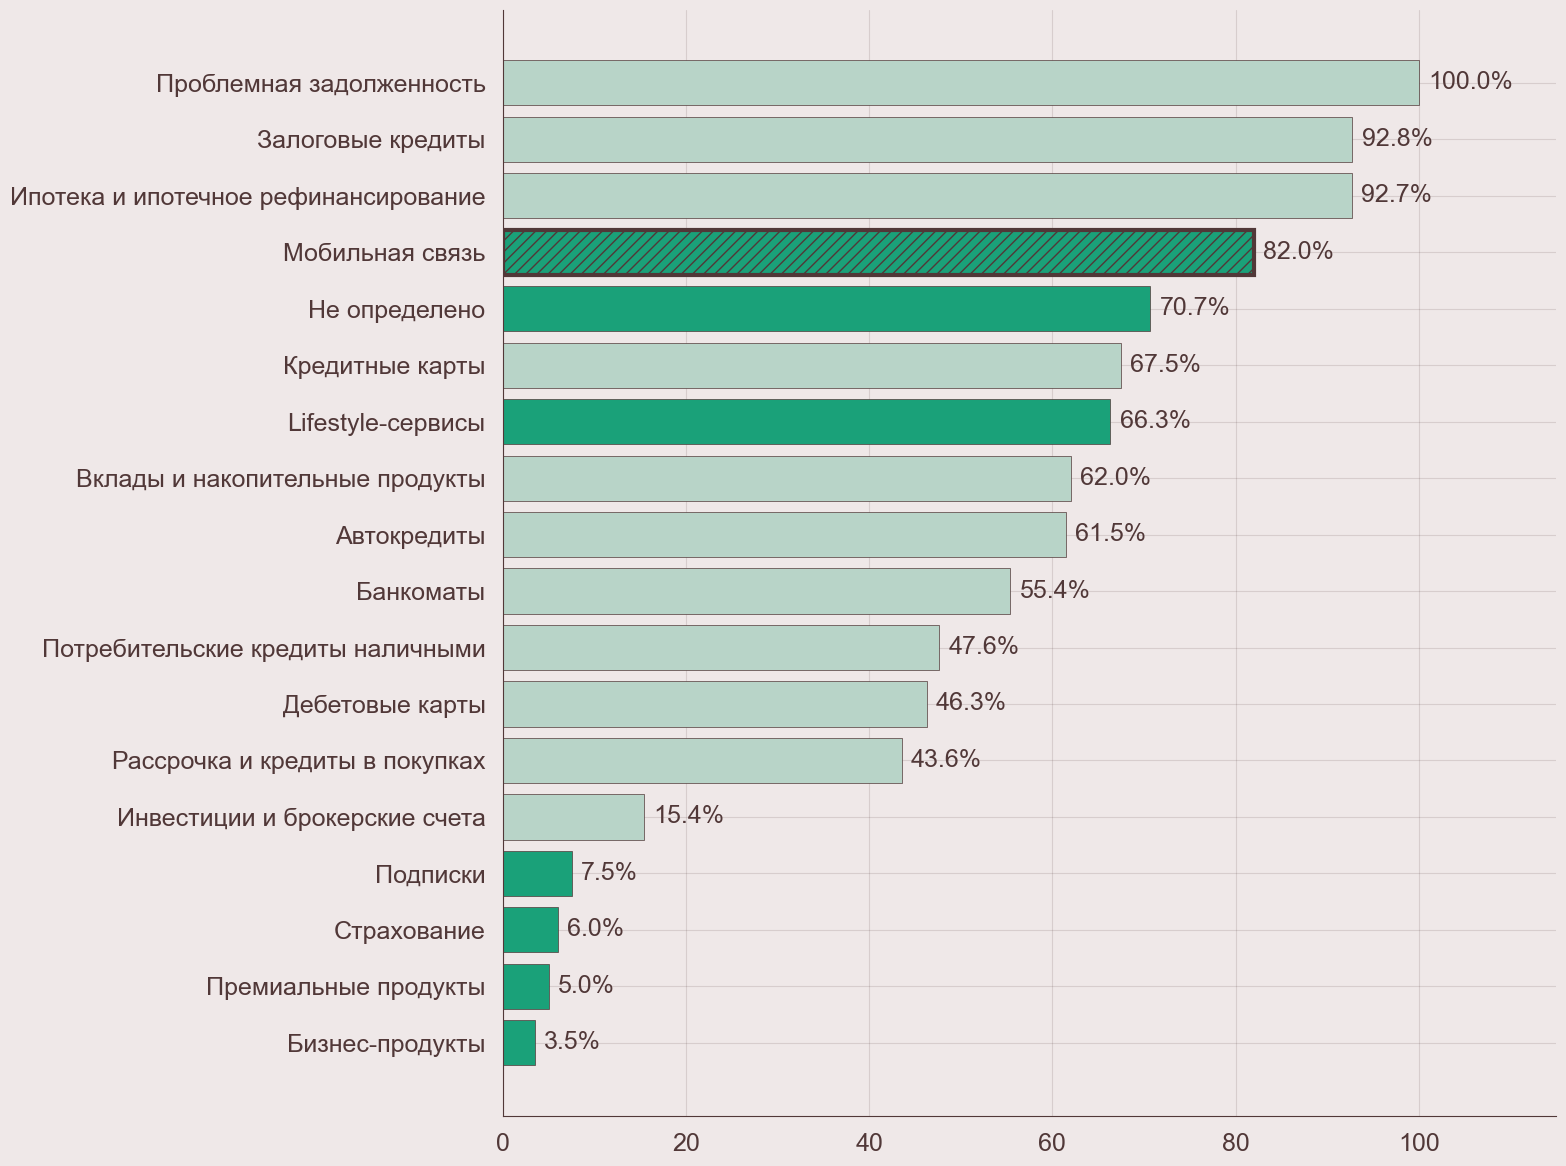

In [73]:
# Визуализация распределения негативных отзывов по группам продуктов
# Сортируем в обратном порядке (от меньшего к большему) для отображения сверху вниз
product_stats_renamed = product_stats_filtered.sort_values(by='neg_share_pct', ascending=True).reset_index()

# Определяем финансовые и нефинансовые продукты
financial_products = {
    'Кредитные карты', 'Дебетовые карты', 'Залоговые кредиты', 
    'Ипотека и ипотечное рефинансирование', 'Потребительские кредиты наличными',
    'Автокредиты', 'Вклады и накопительные продукты', 'Рассрочка и кредиты в покупках',
    'Инвестиции и брокерские счета', 'Проблемная задолженность', 'Банкоматы'
}

# Создаем палитру цветов
def get_product_color(product_name):
    if product_name == 'Мобильная связь':
        return colors["green"]
    
    elif product_name not in financial_products:
        return colors['green']  # Яркий зеленый для нефинансовых
    else:
        return '#B8D4C8'  # Бледный для финансовых

product_stats_renamed['color'] = product_stats_renamed['product_group'].apply(get_product_color)

fig, ax = plt.subplots(figsize=(16, 12))

# Рисуем бары с разными цветами
for idx, row in product_stats_renamed.iterrows():
    # Добавляем штриховку для "Мобильная связь"
    if row['product_group'] == 'Мобильная связь':
        hatch_pattern = '///'
        edge_color = colors['text']
        edge_width = 3
    else:
        hatch_pattern = None
        edge_color = colors['text']
        edge_width = 0.5
    
    ax.barh(
        y=idx,
        width=row['neg_share_pct'],
        color=row['color'],
        edgecolor=edge_color,
        linewidth=edge_width,
        hatch=hatch_pattern
    )

# Добавляем значения на столбцы
for idx, row in product_stats_renamed.iterrows():
    ax.text(
        row['neg_share_pct'] + 1,
        idx,
        f"{row['neg_share_pct']:.1f}%",
        va='center',
        ha='left',
        fontsize=18,
    )

# Настраиваем оси
ax.set_yticks(range(len(product_stats_renamed)))
ax.set_yticklabels(product_stats_renamed['product_group'])
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title(None)
ax.set_xlim(0, max(product_stats_renamed['neg_share_pct']) * 1.15)
ax.tick_params(axis='both', labelsize=18)

plt.tight_layout()
plt.show()

## Ключевые выводы по анализу негативных отзывов

### Финансовые продукты: ожидаемо высокий негатив
- **Кредитные и ипотечные продукты** (залоговые кредиты 92.8%, ипотека 92.7%, автокредиты 61.5%) традиционно имеют высокую долю негатива — это стандартная картина для финансового сектора, где клиенты часто выражают недовольство условиями, процентами и обслуживанием долга.

### Нефинансовые продукты: аномально высокий негатив
- **Т-Мобайл** выделяется на фоне других нефинансовых продуктов: **82% негативных отзывов** (n=417) — это сопоставимо с проблемными кредитными продуктами, что выглядит крайне подозрительно для мобильного оператора.
- Для сравнения: другие нефинансовые продукты показывают значительно лучшие результаты — страхование 6.0%, подписки 7.5%, lifestyle-сервисы 66.3%. Такой разрыв указывает на **системные проблемы качества услуг, технической поддержки или ценообразования** в мобильном сегменте.

### Приоритет для детального разбора
- Учитывая нетипично высокую долю негатива у Т-Мобайл среди нефинансовых продуктов, рекомендуется провести **углубленный анализ текстов отзывов** для выявления конкретных причин недовольства (качество связи, тарифы, техподдержка, биллинг).